In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset from Project folder
flight_df = pd.read_excel("a1_FlightFare_Dataset.xlsx")

# To stretch head function output to the notebook width
pd.set_option('display.max_columns', None)

flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#Shape of the Dataset
flight_df.shape

(10001, 11)

In [4]:
#Summary of the dataset
flight_df.describe()

,Price
count,10001.000000
mean,9087.542346
std,4591.173973
min,1759.000000
25%,5276.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
#information about the data, checking datatypes
flight_df.info()
flight_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10001 non-null  object
 1   Date_of_Journey  10001 non-null  object
 2   Source           10001 non-null  object
 3   Destination      10001 non-null  object
 4   Route            10000 non-null  object
 5   Dep_Time         10001 non-null  object
 6   Arrival_Time     10001 non-null  object
 7   Duration         10001 non-null  object
 8   Total_Stops      10000 non-null  object
 9   Additional_Info  10001 non-null  object
 10  Price            10001 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 859.6+ KB


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

<Figure size 1920x1440 with 0 Axes>

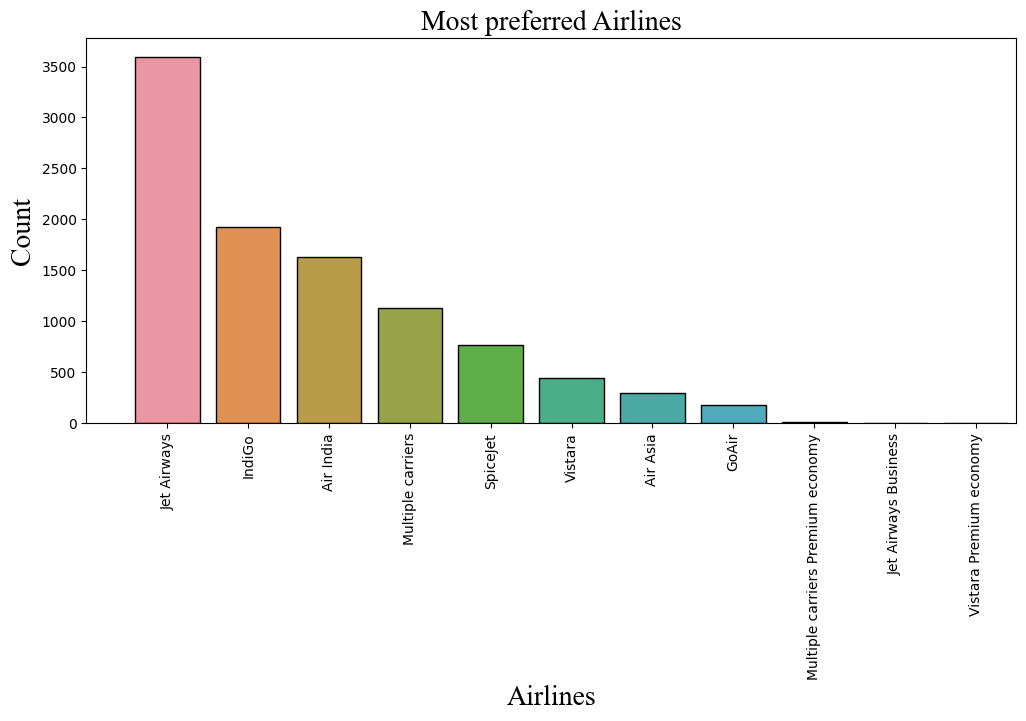

In [6]:
# Exploratory Data Analysis(EDA)
plt.figure(dpi=300)
plt.figure(figsize=(12,5))
sns.countplot(x="Airline", data=flight_df,order = flight_df['Airline'].value_counts().index,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Most preferred Airlines",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Airlines",fontdict=font_style)
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

In [7]:
# Airlines Vs Flight Ticket Price
airlines = flight_df.groupby('Airline').Price.max()
airlines_df= airlines.to_frame().sort_values('Price',ascending=False)[0:10]
airlines_df

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31783
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


<Figure size 1920x1440 with 0 Axes>

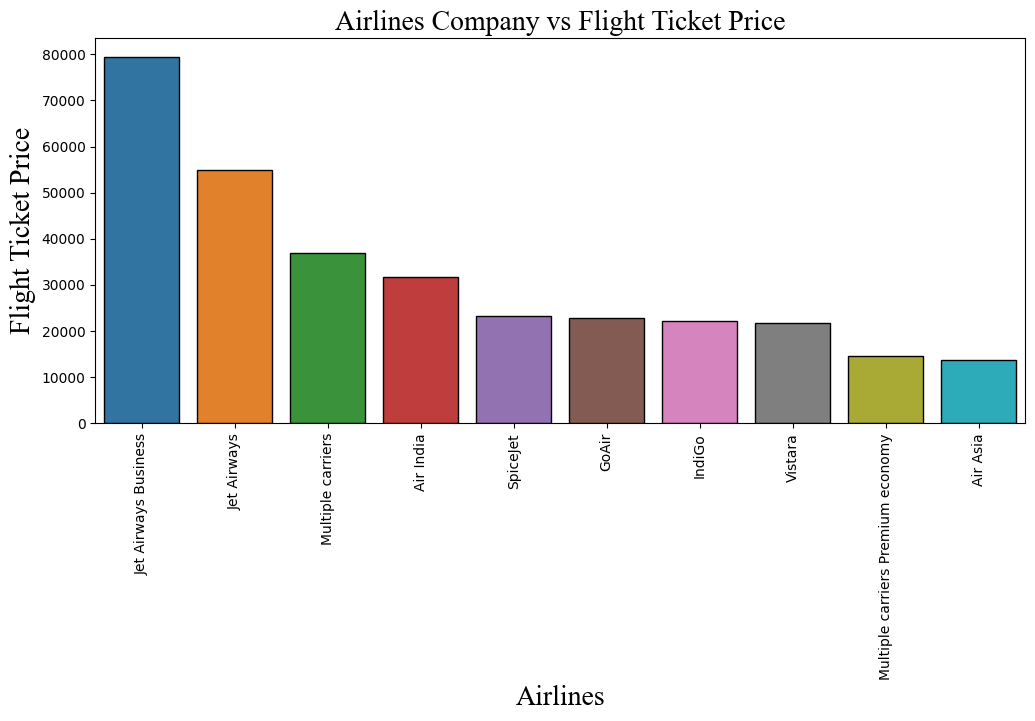

In [8]:
plt.figure(dpi=300)
plt.subplots(figsize=(12,5))
sns.barplot(x=airlines_df.index, y=airlines_df["Price"],ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Airlines Company vs Flight Ticket Price",fontdict=font_style )
plt.ylabel("Flight Ticket Price", fontdict=font_style)
plt.xlabel("Airlines", fontdict=font_style)
plt.xticks(rotation=90)
plt.show()

In [9]:
# Price on Weekdays Vs Weekends
days_df = flight_df[['Airline','Date_of_Journey', 'Price']].copy()
days_df.head()

,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897
1,Air India,1/05/2019,7662
2,Jet Airways,9/06/2019,13882
3,IndiGo,12/05/2019,6218
4,IndiGo,01/03/2019,13302


In [10]:
days_df['Date_of_Journey'] = pd.to_datetime(days_df['Date_of_Journey'],format='%d/%m/%Y')
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend'] = days_df['Weekday'].apply(lambda day: 1 if day == 'Sunday' else 0)
days_df.head()

,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897,Sunday,1
1,Air India,2019-05-01,7662,Wednesday,0
2,Jet Airways,2019-06-09,13882,Sunday,1
3,IndiGo,2019-05-12,6218,Sunday,1
4,IndiGo,2019-03-01,13302,Friday,0


<Figure size 1920x1440 with 0 Axes>

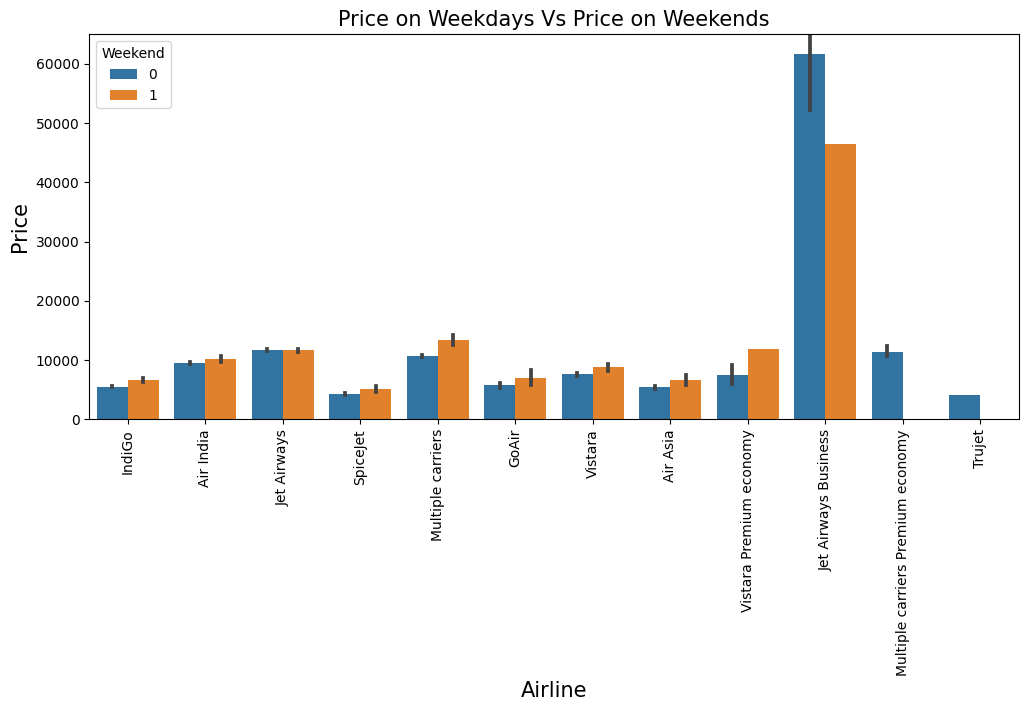

In [11]:
plt.figure(dpi=300)
plt.subplots(figsize=(12,5))
sns.barplot(data=days_df,x='Airline',y='Price',hue='Weekend')
plt.xlabel("Airline",size = 15)
plt.xticks(rotation = 90)
plt.ylabel("Price",size = 15)
plt.title("Price on Weekdays Vs Price on Weekends",size = 15)
plt.legend(title='Weekend'.title())
plt.ylim(0,65000)
plt.show()

In [12]:
# Feature Engineering
# Extact day, month, year from Date_of_Journey feature and store them in new columns. 

flight_df["Journey_date"]=flight_df["Date_of_Journey"].str.split("/").str[0].astype(int)
flight_df["Journey_month"]=flight_df["Date_of_Journey"].str.split("/").str[1].astype(int)
flight_df["Journey_year"]=flight_df["Date_of_Journey"].str.split("/")

In [13]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,"[24, 03, 2019]"
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,"[1, 05, 2019]"
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,"[9, 06, 2019]"
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,"[12, 05, 2019]"
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,"[01, 03, 2019]"


In [14]:
# Now Date_of_Journey column is no longer required, so we can drop it.

flight_df=flight_df.drop(["Date_of_Journey"],axis=1)

In [15]:
flight_df["Journey_year"].value_counts()

Journey_year
[6, 06, 2019]     475
[18, 05, 2019]    470
[9, 06, 2019]     468
[21, 05, 2019]    463
[12, 06, 2019]    455
[9, 05, 2019]     447
[21, 03, 2019]    398
[15, 05, 2019]    382
[27, 05, 2019]    361
[24, 06, 2019]    336
[27, 06, 2019]    333
[1, 06, 2019]     325
[3, 06, 2019]     308
[15, 06, 2019]    302
[24, 03, 2019]    295
[6, 03, 2019]     292
[27, 03, 2019]    280
[24, 05, 2019]    272
[6, 05, 2019]     270
[1, 05, 2019]     258
[1, 04, 2019]     245
[12, 05, 2019]    239
[3, 03, 2019]     204
[9, 03, 2019]     187
[15, 03, 2019]    152
[18, 03, 2019]    145
[01, 03, 2019]    142
[12, 03, 2019]    135
[9, 04, 2019]     115
[3, 04, 2019]     106
[21, 06, 2019]    102
[09, 03, 2019]     96
[18, 06, 2019]     95
[06, 03, 2019]     91
[6, 04, 2019]      90
[3, 05, 2019]      87
[27, 04, 2019]     87
[03, 03, 2019]     86
[15, 04, 2019]     84
[24, 04, 2019]     84
[21, 04, 2019]     77
[18, 04, 2019]     61
[12, 04, 2019]     57
[1, 03, 2019]      44
Name: count, dtype:

In [16]:
# Since Journey_year is the same ("2019") for all rows, we can drop it.
flight_df=flight_df.drop(["Journey_year"],axis=1)
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [17]:
# Total_Stops 
flight_df["Total_Stops"]=flight_df["Total_Stops"].str.split(" ").str[0]
flight_df["Total_Stops"]=flight_df["Total_Stops"].replace("non-stop","0")
flight_df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3


In [18]:
# Extracting hours and min from Arrival time, Departure time
# Arrival_Time
flight_df["Arrival_Time"]=flight_df["Arrival_Time"].str.split(" ").str[0]
flight_df['Arrival_hour']=flight_df["Arrival_Time"].str.split(':').str[0].astype(int)
flight_df['Arrival_min']=flight_df["Arrival_Time"].str.split(':').str[1].astype(int)
flight_df=flight_df.drop(["Arrival_Time"],axis=1)
#Dep_Time
flight_df['Dep_hour']=flight_df["Dep_Time"].str.split(':').str[0].astype(int)
flight_df['Dep_min']=flight_df["Dep_Time"].str.split(':').str[1].astype(int)
flight_df=flight_df.drop(["Dep_Time"],axis=1)

flight_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,21,35,16,50


In [19]:
flight_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [20]:
flight_df["Duration_hr"]=flight_df["Duration"].str.split('h').str[0]
flight_df['Duration_hr'].str.contains('m').sum()

1

In [21]:
flight_df[flight_df['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr
6474,Air India,Mumbai,Hyderabad,5m,2,17327,6,3,16,55,16,50,5m


In [22]:
flight_df["Duration_hr"]=flight_df["Duration_hr"].replace("5m","0")

In [23]:
flight_df["Duration_min"]=flight_df["Duration"].str.split(' ').str[1].str.split('m').str[0]
flight_df['Duration_min'].fillna("0",inplace=True)
flight_df["Duration"]=(flight_df["Duration_hr"].astype(int)*60) + flight_df["Duration_min"].astype(int)
flight_df=flight_df.drop(['Duration_hr','Duration_min'],axis=1)
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,21,35,16,50


In [24]:
#Checking for null values
flight_df.isnull().sum()

Airline          0
Source           0
Destination      0
Duration         0
Total_Stops      1
Price            0
Journey_date     0
Journey_month    0
Arrival_hour     0
Arrival_min      0
Dep_hour         0
Dep_min          0
dtype: int64

In [25]:
# Price column has null values. Fill it wiht mean value
flight_df["Price"].fillna(flight_df["Price"].mean(),inplace=True)

In [26]:
# filling Total_Stops
flight_df["Total_Stops"].value_counts()

Total_Stops
1    5281
0    3259
2    1415
3      44
4       1
Name: count, dtype: int64

In [27]:
# '1' is most frequently occuring value. So fill Total_Stops column null values by '1'
flight_df["Total_Stops"]=flight_df["Total_Stops"].fillna('1')
flight_df["Total_Stops"]=flight_df["Total_Stops"].astype(int)

In [28]:
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,21,35,16,50


In [29]:
# Using Encoding to Handle categorical Data
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
for i in ["Airline","Source","Destination"]:
    flight_df[i]=la.fit_transform(flight_df[i])
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,0,5,170,0,3897,24,3,1,10,22,20
1,1,3,0,445,2,7662,1,5,13,15,5,50
2,4,2,1,1140,2,13882,9,6,4,25,9,25
3,3,3,0,325,1,6218,12,5,23,30,18,5
4,3,0,5,285,1,13302,1,3,21,35,16,50


<Figure size 1920x1440 with 0 Axes>

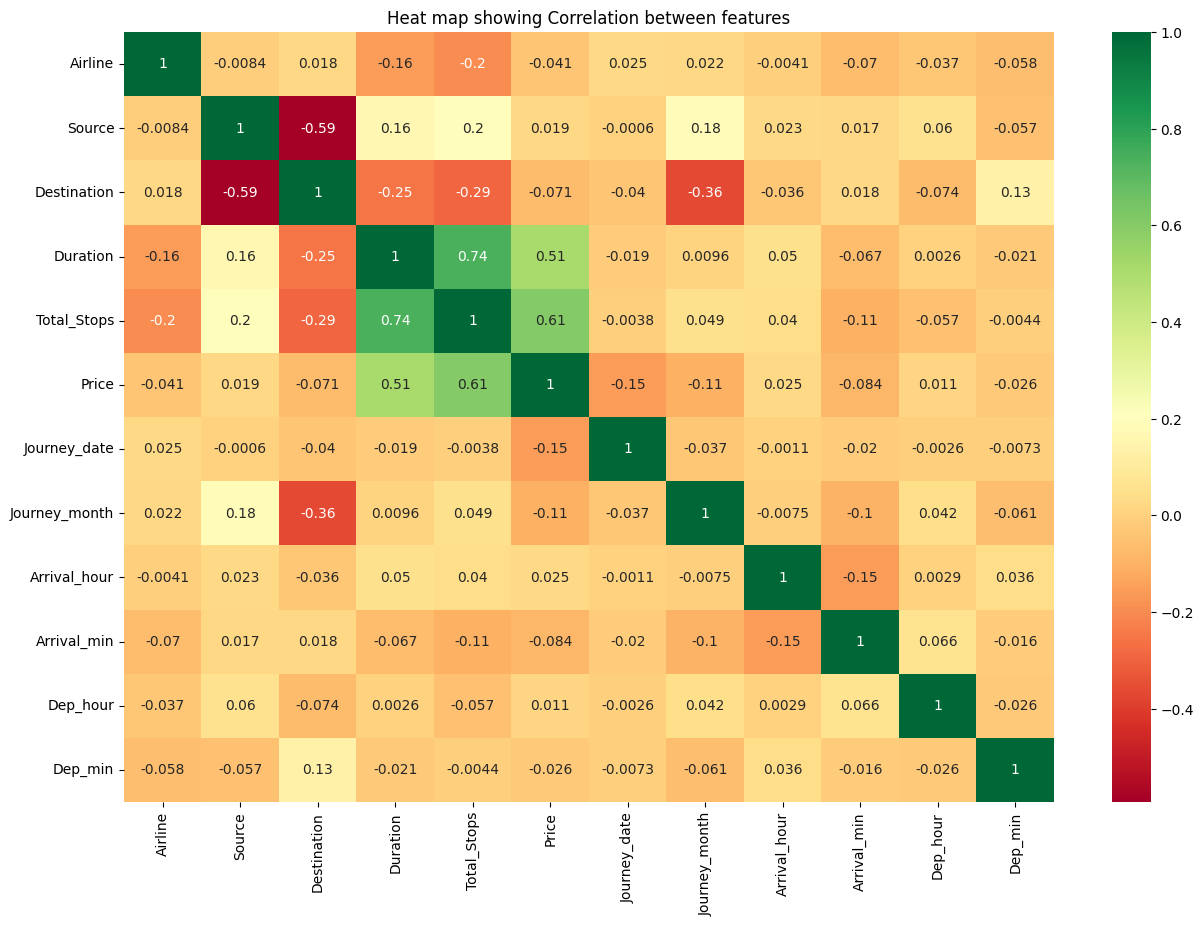

In [30]:
# Use Heatmap to find correlation between features
plt.figure(dpi=300)
plt.figure(figsize=(15,10))
sns.heatmap(flight_df.corr(),annot=True,cmap='RdYlGn')
plt.title("Heat map showing Correlation between features")
plt.show()

In [31]:
#splitting data into x and y
train_df=flight_df[0:10683]
test_df=flight_df[10683:]
x=train_df.drop(["Price"],axis=1)
y=train_df.loc[:,["Price"]].values
# spiliting the dataset into train data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [33]:
#function to train the models
def predict(algorithm):
    print("Algorithm:",algorithm)
    model=algorithm.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("The Predicted Price values are:",y_pred)
    print('\n')
    r2=r2_score(y_test,y_pred)
    print("r2 score :",r2)
    #updating score in df  
    #score=score.append({'Model':algorithm,'Accuracy':r2})
    print('MAE:',(mean_absolute_error(y_test,y_pred)))
    print('MSE:',(mean_squared_error(y_test,y_pred)))
    return(r2)

In [34]:
knn=predict(KNeighborsRegressor())

Algorithm: KNeighborsRegressor()
The Predicted Price values are: [[ 9500.6]
 [10179.8]
 [11814. ]
 ...
 [10773.8]
 [12804.6]
 [11030.6]]


r2 score : 0.5557839491105336
MAE: 1831.9576969212312
MSE: 9766535.67892843


In [35]:
dt=predict(DecisionTreeRegressor())

Algorithm: DecisionTreeRegressor()
The Predicted Price values are: [10031. 11262. 13067. ... 10262. 10368.  9103.]


r2 score : 0.6663694837840737
MAE: 1359.9660469145674
MSE: 7335201.719248412


In [36]:
rf=predict(RandomForestRegressor())

Algorithm: RandomForestRegressor()
The Predicted Price values are: [11620.9775     11701.671      13227.155      ... 10483.01
 10890.0375     10214.94333333]


r2 score : 0.8214545315592428
MAE: 1162.8720353465117
MSE: 3925501.3058308996


In [37]:
# model building
lm = LinearRegression()
lm.fit(x_train,y_train)

# lm.intercept_
# lm.coef_ 

Y_pred = lm.predict(x_test)

In [38]:
# MSE
print("MSE: ", mean_squared_error(y_test, Y_pred))

# RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test, Y_pred)))

# MAE
print("MAE: ", np.sqrt(mean_absolute_error(y_test, Y_pred)))
      
# R2 Score
print("R2 Score: ", r2_score(y_test, Y_pred))

MSE:  12736755.487826986
RMSE:  3568.859129725771
MAE:  49.93291646009531
R2 Score:  0.4206880095514056


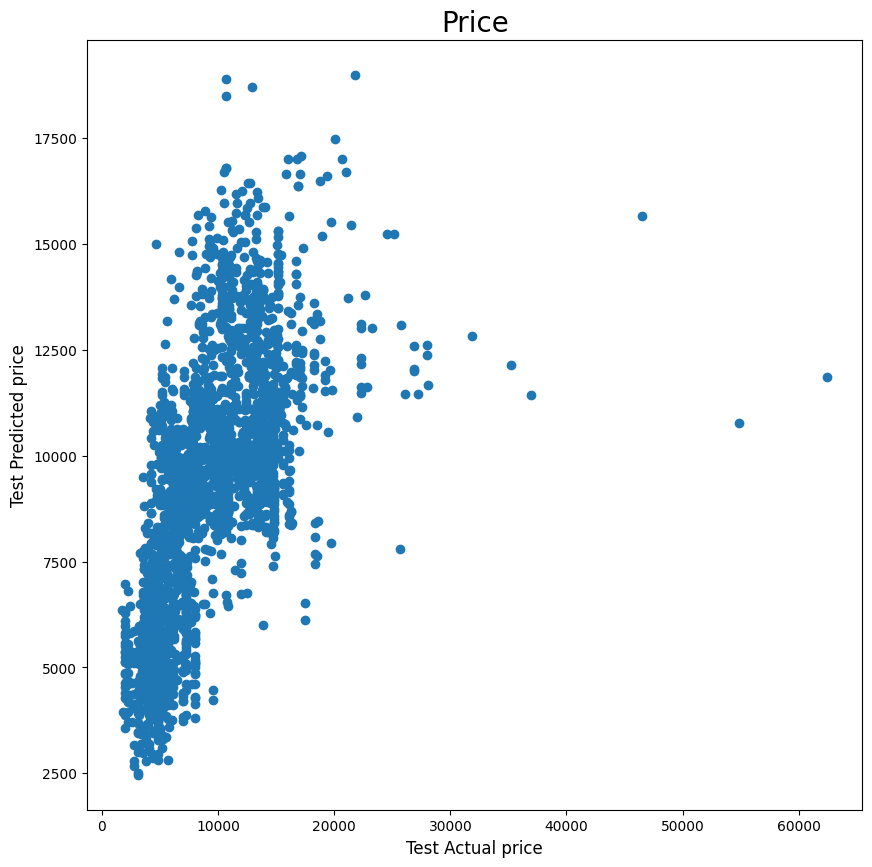

In [39]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_title("Price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(y_test, Y_pred)
plt.show()

In [40]:
#storing the accuracies of these 3 models in a dataframe
score_df=pd.DataFrame({'Model': ['K-Nearest Neighbour',
                                 'Decision Tree','Random Forest'], 
                       'Accuracy': [ knn*100,dt*100, rf*100]})
score_df

,Model,Accuracy
0,K-Nearest Neighbour,55.578395
1,Decision Tree,66.636948
2,Random Forest,82.145453


In [41]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

In [42]:
# best parameter
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [43]:
#predicting the values
pred=rf_model.predict(x_test)
r2_score(y_test,pred)

0.8034716020626532

In [44]:
print('r2_score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2_score: 0.8034716020626532
MAE: 1228.4921048994938
MSE: 4320874.05786997
RMSE: 2078.6712240924417


In [45]:
import pickle
file=open('flight_model.pkl','wb')
pickle.dump(rf_model,file)

In [46]:
model = open('flight_model.pkl','rb')
forest = pickle.load(model)

In [47]:
result=forest.predict(x_test)
print("The predicted prices are",result)
print("r2 score = ",r2_score(y_test,result))

The predicted prices are [11473.93910478 11201.05395025 12668.19583187 ... 10926.30160263
 12302.89113769 10057.68295735]
r2 score =  0.8034716020626532
